## Air Pollution in India

**Air pollution occurs when harmful or excessive qualities of substances including gases, particles, and biological molecules are introduced into the Earth's atmosphere. Air pollution in India is a serious issue, ranking higher than smoking, high blood pressure, child and maternal malnutrition, and risk factors for diabetes. At least 140 million people breathe air 10 times or more over the WHO safe limit and 13 of the world's 20 cities with the highest annual levels of air pollution are in India.**

<img src="images/air_pollution.jpg" alt="Drawing" style="width: 300px;" align="left"/>

<img src="images/Sources_of_Air_Pollution.png" alt="Drawing" style="width: 300px;" align="right"/>

**There are four main types of air pollution sources:**

-  mobile sources – such as cars, buses, planes, trucks, and trains
-  stationary sources – such as power plants, oil refineries, industrial facilities, and factories
-  area sources – such as agricultural areas, cities, and wood burning fireplaces
-  natural sources – such as wind-blown dust, wildfires, and volcanoes

**Pollution from human-generated and natural sources is often created in one place and transported through the air. Sometimes chemical reactions in the atmosphere change pollutants before they are deposited. Pollutants in the air can create haze, making it harder to see, and pollutant deposition can have biological effects. NPS areas experience these effects just like other places. Location and even the time of year can determine which pollution sources are most important to each park.**


### India Air Quality

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('data.csv',encoding = "ISO-8859-1")
df.head()

C:\Users\prath\Anaconda3\envs\DL\lib\site-packages\IPython\core\interactiveshell.py:3020: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,stn_code,sampling_date,state,location,agency,type,so2,no2,rspm,spm,location_monitoring_station,pm2_5,date
0,150,February - M021990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",4.8,17.4,NaN,NaN,NaN,NaN,1990-02-01
1,151,February - M021990,Andhra Pradesh,Hyderabad,NaN,Industrial Area,3.1,7.0,NaN,NaN,NaN,NaN,1990-02-01
2,152,February - M021990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",6.2,28.5,NaN,NaN,NaN,NaN,1990-02-01
3,150,March - M031990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",6.3,14.7,NaN,NaN,NaN,NaN,1990-03-01
4,151,March - M031990,Andhra Pradesh,Hyderabad,NaN,Industrial Area,4.7,7.5,NaN,NaN,NaN,NaN,1990-03-01


**from the output above we can clearly see that there are several NULL values in our data which we neeed to tackle**

In [3]:
df.shape

(435742, 13)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 435742 entries, 0 to 435741
Data columns (total 13 columns):
stn_code                       291665 non-null object
sampling_date                  435739 non-null object
state                          435742 non-null object
location                       435739 non-null object
agency                         286261 non-null object
type                           430349 non-null object
so2                            401096 non-null float64
no2                            419509 non-null float64
rspm                           395520 non-null float64
spm                            198355 non-null float64
location_monitoring_station    408251 non-null object
pm2_5                          9314 non-null float64
date                           435735 non-null object
dtypes: float64(5), object(8)
memory usage: 43.2+ MB


In [5]:
# looking at all the columns of the dataframe
df.columns

Index(['stn_code', 'sampling_date', 'state', 'location', 'agency', 'type',
       'so2', 'no2', 'rspm', 'spm', 'location_monitoring_station', 'pm2_5',
       'date'],
      dtype='object')

*Column-wise no. of NULL values*

In [6]:
for col in df.columns:
    print(col,":",df[col].isnull().sum())

stn_code : 144077
sampling_date : 3
state : 0
location : 3
agency : 149481
type : 5393
so2 : 34646
no2 : 16233
rspm : 40222
spm : 237387
location_monitoring_station : 27491
pm2_5 : 426428
date : 7


**From this we can clearly see that a large amount of values are missing in our data**

**We have a large no. of missing values in the following columns**

-  pm2_5
-  spm
-  agency
-  stn_code

*from the above if we drop the columns **agency** and **stn_code** we might not be at huge risk of data loss.*

*Also other features like **sampling_date** and **location_monitoring_station** do not pose much importance to our data as other features might do.*

*These feature would have been useful if one wants to go deep into the EDA*

*Also sampling_date looks some what alike the date feature so we could remove the feature with no or minimal loss of data.*

In [7]:
df.drop(['stn_code','agency','sampling_date','location_monitoring_station'],axis=1,inplace=True)
df.head()

,state,location,type,so2,no2,rspm,spm,pm2_5,date
0,Andhra Pradesh,Hyderabad,"Residential, Rural and other Areas",4.8,17.4,NaN,NaN,NaN,1990-02-01
1,Andhra Pradesh,Hyderabad,Industrial Area,3.1,7.0,NaN,NaN,NaN,1990-02-01
2,Andhra Pradesh,Hyderabad,"Residential, Rural and other Areas",6.2,28.5,NaN,NaN,NaN,1990-02-01
3,Andhra Pradesh,Hyderabad,"Residential, Rural and other Areas",6.3,14.7,NaN,NaN,NaN,1990-03-01
4,Andhra Pradesh,Hyderabad,Industrial Area,4.7,7.5,NaN,NaN,NaN,1990-03-01


In [8]:
for col in df.columns:
    print(col,":",df[col].isnull().sum())

state : 0
location : 3
type : 5393
so2 : 34646
no2 : 16233
rspm : 40222
spm : 237387
pm2_5 : 426428
date : 7


**Now our task is to remove all the NULL values from the columns that concern us the most ie. so2, no2, rspm, spm, pm2_5.**
**But first let us explore other features and see if we can get some insights into the data from them.**

In [9]:
df.state.unique()

array(['Andhra Pradesh', 'Arunachal Pradesh', 'Assam', 'Bihar',
       'Chandigarh', 'Chhattisgarh', 'Dadra & Nagar Haveli',
       'Daman & Diu', 'Delhi', 'Goa', 'Gujarat', 'Haryana',
       'Himachal Pradesh', 'Jammu & Kashmir', 'Jharkhand', 'Karnataka',
       'Kerala', 'Madhya Pradesh', 'Maharashtra', 'Manipur', 'Meghalaya',
       'Mizoram', 'Nagaland', 'Odisha', 'Puducherry', 'Punjab',
       'Rajasthan', 'Sikkim', 'Tamil Nadu', 'Telangana', 'Uttar Pradesh',
       'Uttarakhand', 'Uttaranchal', 'West Bengal',
       'andaman-and-nicobar-islands', 'Lakshadweep', 'Tripura'],
      dtype=object)

In [10]:
df.groupby('state').count()

,location,type,so2,no2,rspm,spm,pm2_5,date
state,,,,,,,,
Andhra Pradesh,26368,25758,25681,25817,25228,11789,0,26368
Arunachal Pradesh,90,90,67,66,89,0,0,90
Assam,19361,19116,19228,19282,19083,5895,0,19361
Bihar,2275,2136,2127,2190,1333,1780,0,2275
Chandigarh,8520,8520,4419,7586,8142,4951,0,8520
Chhattisgarh,7831,7831,7329,7495,6764,3942,0,7831
Dadra & Nagar Haveli,634,603,629,629,438,422,43,634
Daman & Diu,782,782,781,782,439,565,44,782
Delhi,8551,8551,7810,8007,6667,5459,371,8551


There are thus states where we do not have any data at all like **lakshadweep** and **andaman-and-nicobar-islands**,and we have several places were there is no record for a certian features like **pm2.5** in several states etc.

To tackle these data we have 2 options:-
-  to assign all missing values with 0
-  to assign all missing values with either mean, median or mode

Here we are going to use the 2nd approach as we have no idea about the missing values, using the 2nd approach would make the missing values float beween the lowest and highest values and they would not interupt in between our analysis over the original data.

Another problem which we need to tackle is the multiple naming of same states like Uttaranchal and Uttarakhand.


In [11]:
df.type.unique()

array(['Residential, Rural and other Areas', 'Industrial Area', nan,
       'Sensitive Area', 'Industrial Areas', 'Residential and others',
       'Sensitive Areas', 'Industrial', 'Residential', 'RIRUO',
       'Sensitive'], dtype=object)

In [12]:
df.groupby('type').count()

,state,location,so2,no2,rspm,spm,pm2_5,date
type,,,,,,,,
Industrial,233,233,183,193,0,226,0,233
Industrial Area,96091,96091,92414,93722,84486,25501,2619,96089
Industrial Areas,51747,51747,44823,48603,47630,46546,0,51747
RIRUO,1304,1304,1304,1304,1304,0,577,1304
Residential,158,158,108,112,0,152,0,158
Residential and others,86791,86791,70882,81774,81852,79461,0,86791
"Residential, Rural and other Areas",179014,179014,173027,174437,165892,35164,6118,179013
Sensitive,495,495,456,470,0,440,0,495
Sensitive Area,8980,8980,8856,8860,8781,759,0,8979


In [13]:
# solving issue of multiple naming of states
df.replace({'state':{'Uttaranchal':'Uttarakhand'}}, regex=True, inplace=True)

In [14]:
df['state'].unique()

array(['Andhra Pradesh', 'Arunachal Pradesh', 'Assam', 'Bihar',
       'Chandigarh', 'Chhattisgarh', 'Dadra & Nagar Haveli',
       'Daman & Diu', 'Delhi', 'Goa', 'Gujarat', 'Haryana',
       'Himachal Pradesh', 'Jammu & Kashmir', 'Jharkhand', 'Karnataka',
       'Kerala', 'Madhya Pradesh', 'Maharashtra', 'Manipur', 'Meghalaya',
       'Mizoram', 'Nagaland', 'Odisha', 'Puducherry', 'Punjab',
       'Rajasthan', 'Sikkim', 'Tamil Nadu', 'Telangana', 'Uttar Pradesh',
       'Uttarakhand', 'West Bengal', 'andaman-and-nicobar-islands',
       'Lakshadweep', 'Tripura'], dtype=object)

**Now let us plot a bar graph to see how much of our data belong to which type using**

```python
plt.bar(df.type.unique(),df.groupby('type').count()['state'].values)
plt.show()
```

But our data still contains several NULL values that restrict us to visualize our data through plots.<br>
So let us first remove all the NULL values from our data.

**Fixing all missing values for all the features with dtype as float**

In [15]:
from sklearn.preprocessing import Imputer
imputer = Imputer(missing_values = 'NaN', strategy = 'mean', axis = 0)
imputer = imputer.fit(df[['so2', 'no2', 'rspm', 'spm', 'pm2_5']].values)
df[['so2', 'no2', 'rspm', 'spm', 'pm2_5']] = imputer.transform(df[['so2', 'no2', 'rspm', 'spm', 'pm2_5']].values)
df.head()

C:\Users\prath\Anaconda3\envs\DL\lib\site-packages\sklearn\utils\deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


,state,location,type,so2,no2,rspm,spm,pm2_5,date
0,Andhra Pradesh,Hyderabad,"Residential, Rural and other Areas",4.8,17.4,108.832784,220.78348,40.791467,1990-02-01
1,Andhra Pradesh,Hyderabad,Industrial Area,3.1,7.0,108.832784,220.78348,40.791467,1990-02-01
2,Andhra Pradesh,Hyderabad,"Residential, Rural and other Areas",6.2,28.5,108.832784,220.78348,40.791467,1990-02-01
3,Andhra Pradesh,Hyderabad,"Residential, Rural and other Areas",6.3,14.7,108.832784,220.78348,40.791467,1990-03-01
4,Andhra Pradesh,Hyderabad,Industrial Area,4.7,7.5,108.832784,220.78348,40.791467,1990-03-01


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 435742 entries, 0 to 435741
Data columns (total 9 columns):
state       435742 non-null object
location    435739 non-null object
type        430349 non-null object
so2         435742 non-null float64
no2         435742 non-null float64
rspm        435742 non-null float64
spm         435742 non-null float64
pm2_5       435742 non-null float64
date        435735 non-null object
dtypes: float64(5), object(4)
memory usage: 29.9+ MB


*So now we only have one column ie. **type** with missing values*

**Fixing missing values for type feature**

In [17]:
# the most frequent occurung value for type is Residential, Rural and other Areas, 
# thus replacing all missing values under type with Residential, Rural and other Areas

df['type']=df['type'].fillna('Residential, Rural and other Areas')

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 435742 entries, 0 to 435741
Data columns (total 9 columns):
state       435742 non-null object
location    435739 non-null object
type        435742 non-null object
so2         435742 non-null float64
no2         435742 non-null float64
rspm        435742 non-null float64
spm         435742 non-null float64
pm2_5       435742 non-null float64
date        435735 non-null object
dtypes: float64(5), object(4)
memory usage: 29.9+ MB


**So now all our missing values are replaced by certain other values and now we do not have any NULL values in our data<br>So we can now jump straight into data analysis.**

-  Let us first look at the states with highest emmision of a particular pollutant

<img src="images/no2emmision.png" alt="Drawing" style="width: 300px;" align="right"/>

**NO2 :** Nitrogen dioxide is a nasty-smelling gas. Some nitrogen dioxide is formed naturally in the atmosphere by lightning and some is produced by plants, soil and water. However, only about 1% of the total amount of nitrogen dioxide found in our cities' air is formed this way.

Nitrogen dioxide is an important air pollutant because it contributes to the formation of photochemical smog, which can have significant impacts on human health.

The major source of nitrogen dioxide in is the burning of fossil fuels: coal, oil and gas.

The main effect of breathing in raised levels of nitrogen dioxide is the increased likelihood of respiratory problems. Nitrogen dioxide inflames the lining of the lungs, and it can reduce immunity to lung infections. This can cause problems such as wheezing, coughing, colds, flu and bronchitis.

Increased levels of nitrogen dioxide can have significant impacts on people with asthma because it can cause more frequent and more intense attacks. Children with asthma and older people with heart disease are most at risk.

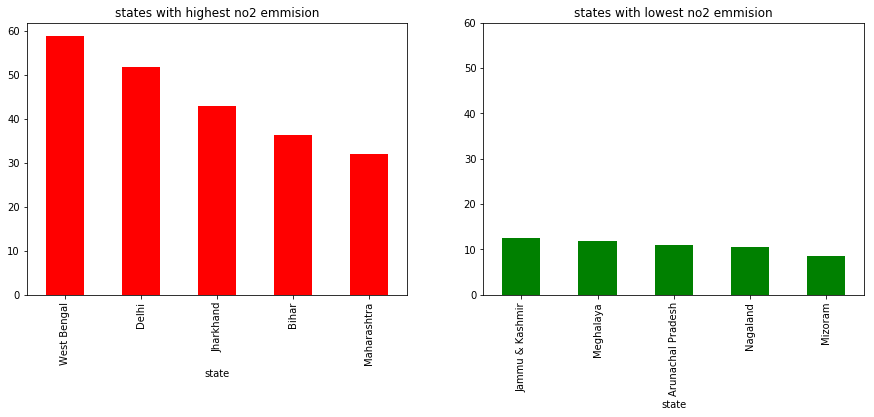

In [19]:
fig, axarr = plt.subplots(1, 2, squeeze=False, figsize=(15,5))

df[['state','no2']].groupby('state').mean().sort_values(by='no2',ascending=False).head().plot(kind='bar',
                                                                                              ax=axarr[0][0],
                                                                                              color='red',
                                                                                              title='states with highest no2 emmision',
                                                                                              yticks=range(0,61,10),
                                                                                              legend=False)

df[['state','no2']].groupby('state').mean().sort_values(by='no2',ascending=False).tail().plot(kind='bar',
                                                                                              ax=axarr[0][1],
                                                                                              color='green',
                                                                                              title='states with lowest no2 emmision',
                                                                                              yticks=range(0,61,10),
                                                                                              legend=False)
plt.show()

##### From the plots we can conclude that: 

<img src="images/so2emmision.jpg" alt="Drawing" style="width: 300px;" align="right"/>

**SO2 :** Sulfur dioxide is a gas. It is invisible and has a nasty, sharp smell. It reacts easily with other substances to form harmful compounds, such as sulfuric acid, sulfurous acid and sulfate particles.

About 99% of the sulfur dioxide in air comes from human sources. The main source of sulfur dioxide in the air is industrial activity that processes materials that contain sulfur, eg the generation of electricity from coal, oil or gas that contains sulfur. 

Sulfur dioxide affects human health when it is breathed in. It irritates the nose, throat, and airways to cause coughing, wheezing, shortness of breath, or a tight feeling around the chest. The effects of sulfur dioxide are felt very quickly and most people would feel the worst symptoms in 10 or 15 minutes after breathing it in.

Those most at risk of developing problems if they are exposed to sulfur dioxide are people with asthma or similar conditions.

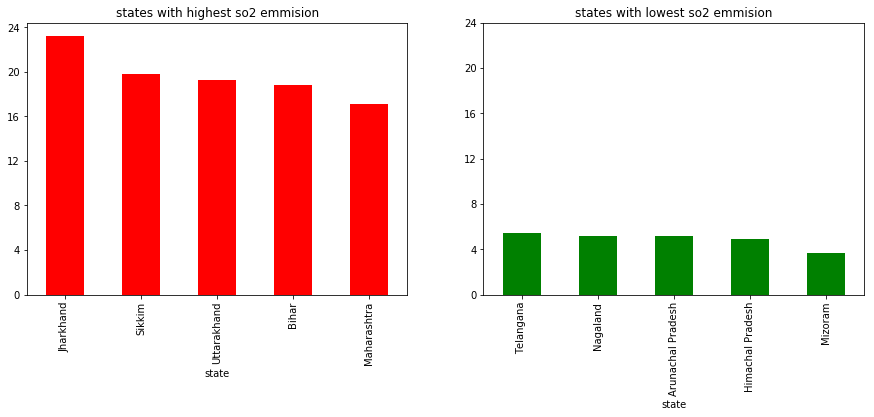

In [20]:
fig, axarr = plt.subplots(1, 2, squeeze=False, figsize=(15,5))

df[['state','so2']].groupby('state').mean().sort_values(by='so2',ascending=False).head().plot(kind='bar',
                                                                                              ax=axarr[0][0],
                                                                                              color='red',
                                                                                              title='states with highest so2 emmision',
                                                                                              yticks=range(0,25,4),
                                                                                              legend=False)

df[['state','so2']].groupby('state').mean().sort_values(by='so2',ascending=False).tail().plot(kind='bar',
                                                                                              ax=axarr[0][1],
                                                                                              color='green',
                                                                                              title='states with lowest so2 emmision',
                                                                                              yticks=range(0,25,4),
                                                                                              legend=False)
plt.show()

##### From the plots we can conclude that : 

**RSPM(Respirable Suspended Particulate Matter) :**
RSPM is that fraction of TSPM which is readily inhaled by humans through their respiratory system and in general, considered as particulate matter with their diameter (aerodynamic) less than 2.5 micrometers. Larger particles would be filtered in the nasal duct.


(TSPM: Stands for Total Suspended Particulate Matter and would essentially be the concentration one would get when a high-volume bulk sampling is done on a filter substrate.)

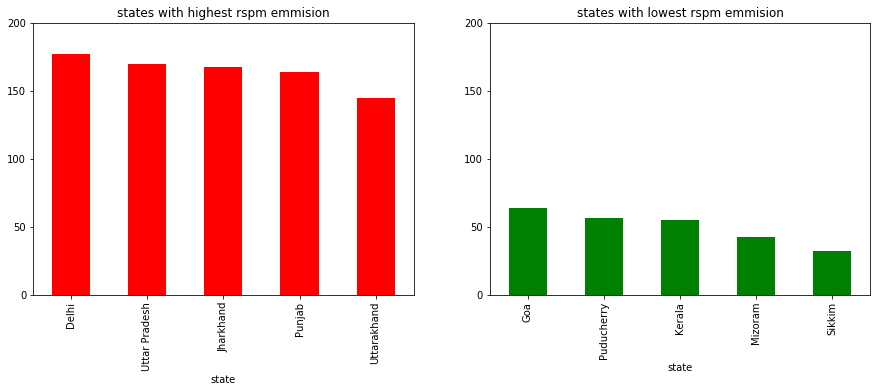

In [21]:
fig, axarr = plt.subplots(1, 2, squeeze=False, figsize=(15,5))

df[['state','rspm']].groupby('state').mean().sort_values(by='rspm',ascending=False).head().plot(kind='bar',
                                                                                              ax=axarr[0][0],
                                                                                              color='red',
                                                                                              title='states with highest rspm emmision',
                                                                                              yticks=range(0,250,50),
                                                                                              legend=False)

df[['state','rspm']].groupby('state').mean().sort_values(by='rspm',ascending=False).tail().plot(kind='bar',
                                                                                              ax=axarr[0][1],
                                                                                              color='green',
                                                                                              title='states with lowest rspm emmision',
                                                                                              yticks=range(0,250,50),
                                                                                              legend=False)
plt.show()

##### From the plots we can conclude that the 

<img src="images/spmemmision.png" alt="Drawing" style="width: 300px;" align="right"/>


**SPM :** Suspended particulate matter – also known as particulate matter (PM) or particulates – are microscopic solid or liquid matter suspended in the Earth's atmosphere. Particulate matter is the sum of all solid and liquid particles suspended in air many of which are hazardous.

This complex mixture includes both organic and inorganic particles, such as dust, pollen, soot, smoke, and liquid droplets. 

These particles vary greatly in size, composition, and origin. It consists of microscopically small solid particles or liquid droplets suspended in the air. The smaller the particles, the deeper they can penetrate into the respiratory system and the more hazardous they are to breathe. Particulate matter is primarily a problem in the wintertime in the Bay Area, when seasonal wood-burning makes a substantial contribution.

(TSP:total suspended particulates) 

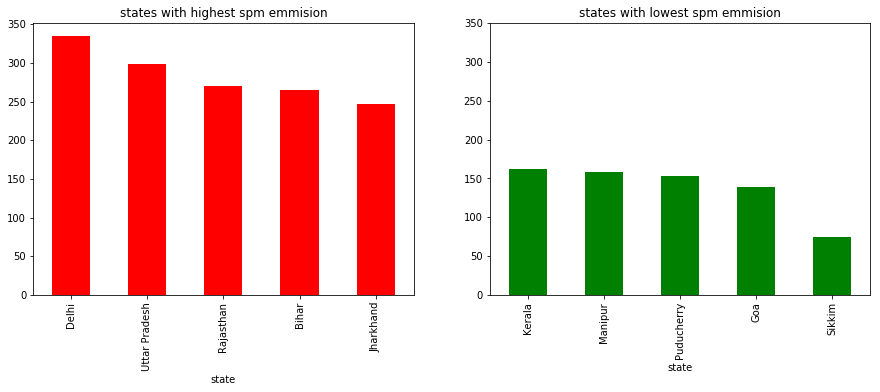

In [22]:
fig, axarr = plt.subplots(1, 2, squeeze=False, figsize=(15,5))

df[['state','spm']].groupby('state').mean().sort_values(by='spm',ascending=False).head().plot(kind='bar',
                                                                                              ax=axarr[0][0],
                                                                                              color='red',
                                                                                              title='states with highest spm emmision',
                                                                                              yticks=range(0,400,50),
                                                                                              legend=False)

df[['state','spm']].groupby('state').mean().sort_values(by='spm',ascending=False).tail().plot(kind='bar',
                                                                                              ax=axarr[0][1],
                                                                                              color='green',
                                                                                              title='states with lowest spm emmision',
                                                                                              yticks=range(0,400,50),
                                                                                              legend=False)
plt.show()

##### From the plots we can conclude that  :

**PM 2.5 :** Fine particulate matter (PM2.5) is an air pollutant that is a concern for people's health when levels in air are high. PM2.5 are tiny particles in the air that reduce visibility and cause the air to appear hazy when levels are elevated. Outdoor PM2.5 levels are most likely to be elevated on days with little or no wind or air mixing

<img src="images/pm2.5emmision.png" alt="Drawing" style="width: 300px;" align="right"/>

The term fine particles, or particulate matter 2.5 (PM2.5), refers to tiny particles or droplets in the air that are two and one half microns or less in width. Like inches, meters and miles, a micron is a unit of measurement for distance. There are about 25,000 microns in an inch. The widths of the larger particles in the PM2.5 size range would be about thirty times smaller than that of a human hair. The smaller particles are so small that several thousand of them could fit on the period at the end of this sentence.

Particles in the PM2.5 size range are able to travel deeply into the respiratory tract, reaching the lungs. Exposure to fine particles can cause short-term health effects such as eye, nose, throat and lung irritation, coughing, sneezing, runny nose and shortness of breath. Exposure to fine particles can also affect lung function and worsen medical conditions such as asthma and heart disease. 

There are outdoor and indoor sources of fine particles. Outside, fine particles primarily come from car, truck, bus and off-road vehicle (e.g., construction equipment, snowmobile, locomotive) exhausts, other operations that involve the burning of fuels such as wood, heating oil or coal and natural sources such as forest and grass fires. Fine particles also form from the reaction of gases or droplets in the atmosphere from sources such as power plants. These chemical reactions can occur miles from the original source of the emissions.

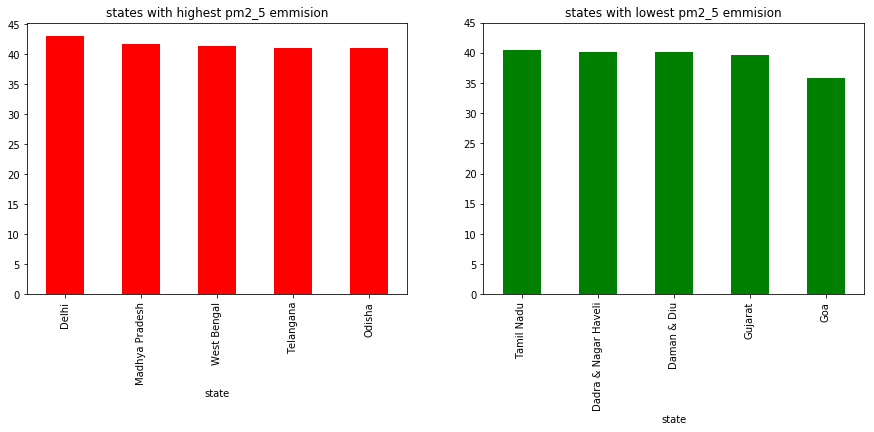

In [23]:
fig, axarr = plt.subplots(1, 2, squeeze=False, figsize=(15,5))

df[['state','pm2_5']].groupby('state').mean().sort_values(by='pm2_5',ascending=False).head().plot(kind='bar',
                                                                                              ax=axarr[0][0],
                                                                                              color='red',
                                                                                              title='states with highest pm2_5 emmision',
                                                                                              yticks=range(0,50,5),
                                                                                              legend=False)

df[['state','pm2_5']].groupby('state').mean().sort_values(by='pm2_5',ascending=False).tail().plot(kind='bar',
                                                                                              ax=axarr[0][1],
                                                                                              color='green',
                                                                                              title='states with lowest pm2_5 emmision',
                                                                                              yticks=range(0,50,5),
                                                                                              legend=False)
plt.show()

##### From the plots we can conclude that the 

**Let us now look at the pairwise relation amongst the pollutants in the atmosphere.**

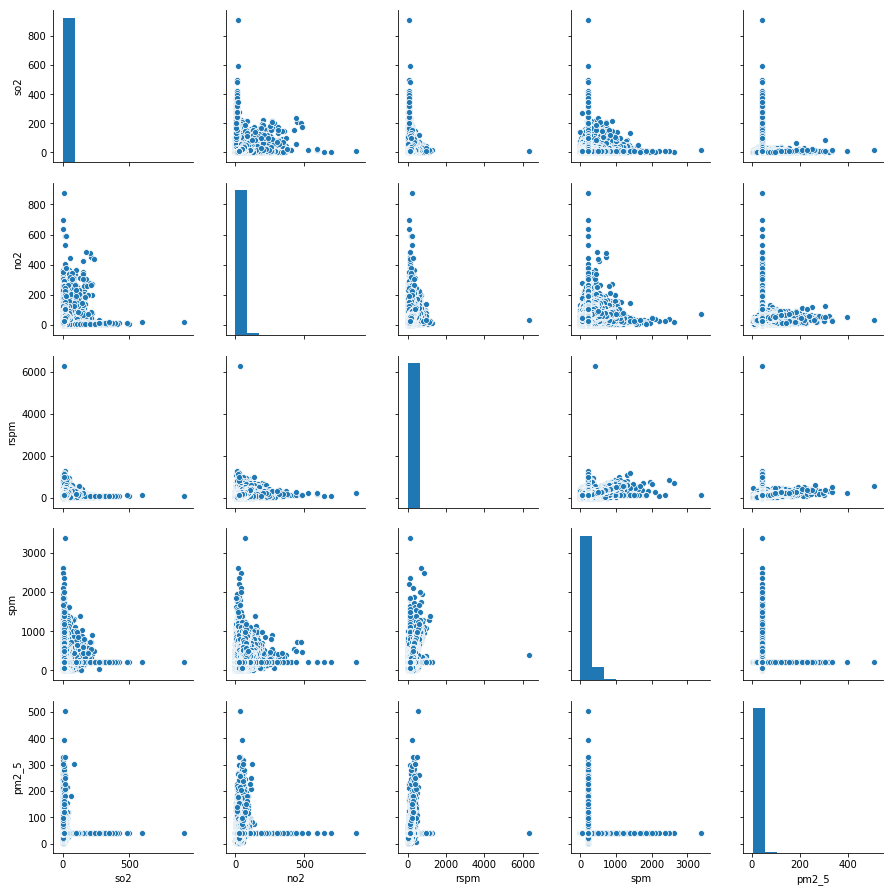

In [24]:
sns.pairplot(df[['so2','no2','rspm','spm','pm2_5']])

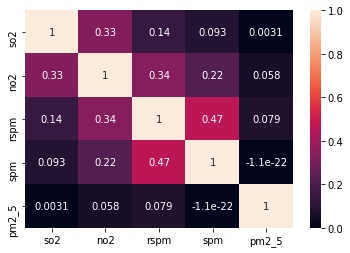

In [49]:
sns.heatmap(df.loc[:, ['state','so2', 'no2', 'rspm', 'spm', 'pm2_5']].corr(), annot=True)

**from this we can infere that :**<br>
-  **SO2 conc.**<br>

```
-  is higher in areas with higher NO2 concentrations.
-  RSPM & SPM have also have some effects on the increase concentration levels of SO2
-  SO2 conc. show no change with increased conc. of pm2.5
```
-  **NO2 conc.**<br>

```
-  conc. of NO2 increases with increase in the amt. of SO2 in atmosphere
-  conc. of NO2 is higher when conc. of RSPM/SPM is low.
```

-  **SPM conc.**<br>

```
-  SPM shows decreasing concentrations with increasing conc of NO2 or SO2
```
-  **pm2.5 conc.**<br>

```
-  Shows somewhat independent nature.
```

*in the above plots we have difficulty in analysing the pairwise relationship of RSPM with other pollutants due to outliers<br>
But since the variation of other pollutants is same with spm and rspm we can assume that they both show similar characteristics.*

questions to ask:<br>
```
do industries which cause emmision of SO2 are also responsible for the decreased quality of air due to pollution from NO2 or vice versa?
```

**Let us now look at the changes in the emmision of pollutants in the atmosphere over time**

for this our first task is to obtain the year from the date feature and group the data according to year before plotting.

In [64]:
#adding a new year column
df['year'] = pd.to_datetime(df['date'],format='%Y-%m-%d').dt.year
df.head()

,state,location,type,so2,no2,rspm,spm,pm2_5,date,year
0,Andhra Pradesh,Hyderabad,"Residential, Rural and other Areas",4.8,17.4,108.832784,220.78348,40.791467,1990-02-01,1990.0
1,Andhra Pradesh,Hyderabad,Industrial Area,3.1,7.0,108.832784,220.78348,40.791467,1990-02-01,1990.0
2,Andhra Pradesh,Hyderabad,"Residential, Rural and other Areas",6.2,28.5,108.832784,220.78348,40.791467,1990-02-01,1990.0
3,Andhra Pradesh,Hyderabad,"Residential, Rural and other Areas",6.3,14.7,108.832784,220.78348,40.791467,1990-03-01,1990.0
4,Andhra Pradesh,Hyderabad,Industrial Area,4.7,7.5,108.832784,220.78348,40.791467,1990-03-01,1990.0


from df.info() we know that there are 7 missing values for date which we need to fill

In [26]:
imputer = Imputer(missing_values = 'NaN', strategy = 'mean', axis = 0)
imputer = imputer.fit(df[['year']].values)
df[['year']] = imputer.transform(df[['year']].values)
df.info()

C:\Users\prath\Anaconda3\envs\DL\lib\site-packages\sklearn\utils\deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 435742 entries, 0 to 435741
Data columns (total 10 columns):
state       435742 non-null object
location    435739 non-null object
type        435742 non-null object
so2         435742 non-null float64
no2         435742 non-null float64
rspm        435742 non-null float64
spm         435742 non-null float64
pm2_5       435742 non-null float64
date        435735 non-null object
year        435742 non-null float64
dtypes: float64(6), object(4)
memory usage: 33.2+ MB


In [65]:
x = df[['so2', 'no2', 'rspm', 'spm', 'pm2_5','year']].groupby('year').mean().reset_index().sort_values(by='year',ascending=False)
x.head()

,year,so2,no2,rspm,spm,pm2_5
28,2015.0,8.482814,23.627529,100.979259,220.783480,40.954952
27,2014.0,9.161688,24.434144,103.334382,220.783480,40.605412
26,2013.0,9.315736,22.306690,107.506982,209.579022,40.791467
25,2012.0,10.896091,24.779108,109.996489,220.783480,40.791467
24,2011.0,11.191143,28.155290,115.716189,211.087735,40.791467


In [66]:
x.describe()

,year,so2,no2,rspm,spm,pm2_5
count,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000
mean,2001.000000,14.996790,27.364497,108.844058,225.565893,40.790689
std,8.514693,4.785383,2.483402,4.225245,20.240598,0.046800
min,1987.000000,6.908129,21.849922,95.438979,185.195995,40.605412
25%,1994.000000,11.191143,25.984429,108.832784,211.087735,40.791467
50%,2001.000000,15.016892,27.590737,108.832784,229.176596,40.791467
75%,2008.000000,19.371225,28.924933,109.363718,239.365472,40.791467
max,2015.000000,23.784821,32.245832,119.321672,278.401290,40.954952


In [60]:
x['year'] = x['year'].astype(int)

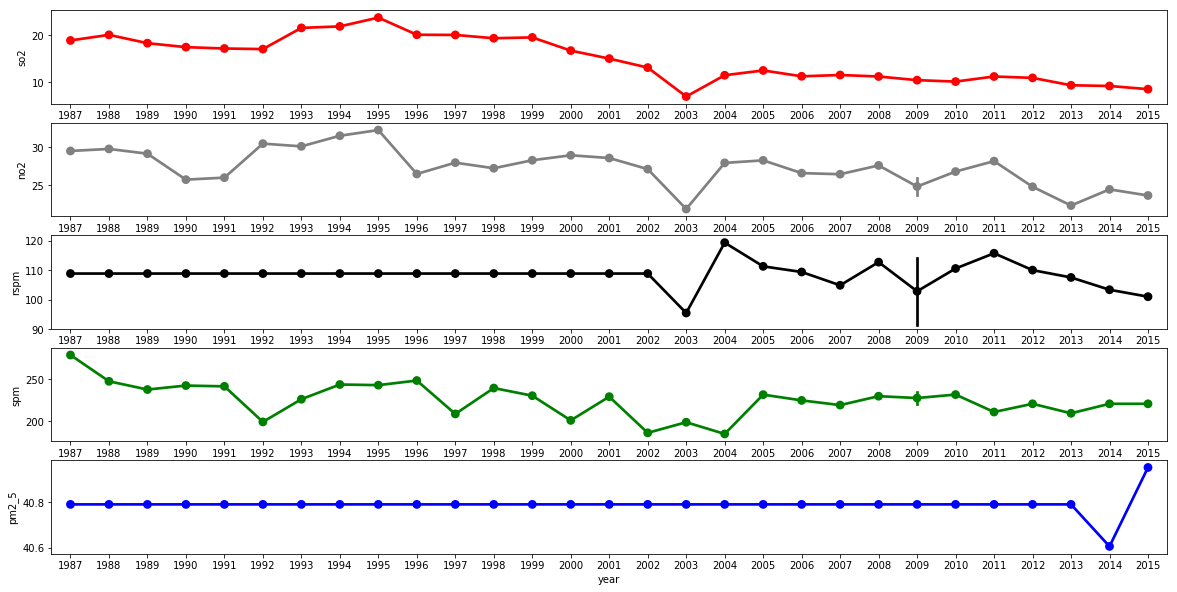

In [61]:
fig ,axarr = plt.subplots(5,1,figsize=(20,10),squeeze=False)

sns.pointplot(x='year', y='so2', data=x[['year','so2']], color='red', ax=axarr[0][0],xticks=range(1987,2015,3))
sns.pointplot(x='year', y='no2', data=x[['year','no2']], color='grey', ax=axarr[1][0],xticks=range(1987,2015,3))
sns.pointplot(x='year', y='rspm', data=x[['year','rspm']], color='black', ax=axarr[2][0],xticks=range(1987,2015,3))
sns.pointplot(x='year', y='spm', data=x[['year','spm']], color='green', ax=axarr[3][0],xticks=range(1987,2015,3))
sns.pointplot(x='year', y='pm2_5', data=x[['year','pm2_5']], color='blue', ax=axarr[4][0],xticks=range(1987,2015,3))

**From the above we can  conclude that the conc./emission of the pollutants in the air have decreased over the period of time<br>These could be the result of the various awareness programs run by governmenet and various NGOs<br>
But the thing to question is<br>**
```
Whether the level of reduction in various pollutants, that we have reached is enough?
Do we need more awareness programs to spread awareness amongst the people about the importance of air quality in which they live?
Do we need further restrictions over the amt. of substances that various industries emit into the air?
```

*One important thing to see is the **rise in the emission of the pollutants after 2003**, this could be the result of some changes in the policies*

**Let us now see the sector wise emission of all pollutants**

In [69]:
x = df[['so2', 'no2', 'rspm', 'spm', 'pm2_5','type']].groupby('type').mean().reset_index().sort_values(by='type',ascending=False)
x

,type,so2,no2,rspm,spm,pm2_5
9,Sensitive Areas,8.341836,23.142252,115.343011,252.662601,40.791467
8,Sensitive Area,5.340401,18.163795,90.144034,211.321551,40.791467
7,Sensitive,10.513227,24.678870,108.832784,225.893114,40.791467
6,"Residential, Rural and other Areas",9.469240,23.589721,102.869962,215.101017,40.753688
5,Residential and others,10.353020,25.413627,102.981682,214.538753,40.791467
4,Residential,13.835891,21.331916,108.832784,272.668993,40.791467
3,RIRUO,10.912577,31.779908,103.617331,220.783480,39.474997
2,Industrial Areas,13.372831,29.737634,121.899020,246.368405,40.791467
1,Industrial Area,13.121105,29.088317,119.966564,222.293673,40.881833
0,Industrial,23.632492,35.795214,108.832784,300.487057,40.791467


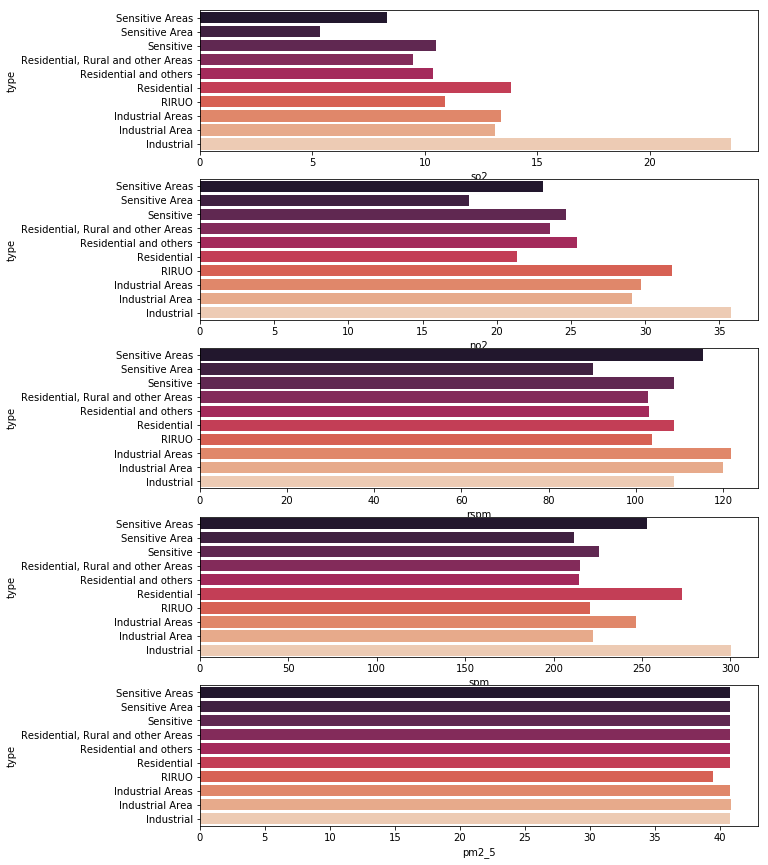

In [82]:
fig, axarr = plt.subplots(5,1,figsize=(10,15), squeeze=False)

sns.barplot(y='type', x='so2', data=x[['type','so2']], palette='rocket', ax=axarr[0][0])
sns.barplot(y='type', x='no2', data=x[['type','no2']], palette='rocket', ax=axarr[1][0])
sns.barplot(y='type', x='rspm', data=x[['type','rspm']], palette='rocket', ax=axarr[2][0])
sns.barplot(y='type', x='spm', data=x[['type','spm']], palette='rocket', ax=axarr[3][0])
sns.barplot(y='type', x='pm2_5', data=x[['type','pm2_5']], palette='rocket', ax=axarr[4][0])


From the plots above we can see that the amt. of emission is **slightly high** in the **sensitive area** for the **Particulate Matters(SPM/RSPM)** which should be controlled.